In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import pickle

from google.colab import drive

%matplotlib inline

drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Q1. Import and understand the data

###Q1 A - Import ‘signal-data.csv’ as DataFrame

In [ ]:
signal_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Neural Network and Deep Learning Project/signal-data.csv')
signal_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


###Q1 B. Print 5 point summary and share at least 2 observations.


In [ ]:
signal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


1. Target column has only 2 values. -1 which is Pass and 1 which is fail.
2. The sample data set is favouring the Pass use case
3. Since there is only 2 value in the target column it should be considerd as the categorical variable rather than performing 5 point summary on it. So we can ignore the 5 point summary for the target column

##Q2 Data cleansing

###Q2 A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [ ]:
signal_df = signal_df.drop('Time', axis=1)
threshold = 0.2

# Calculate the threshold number of null values
threshold_nulls = threshold * len(signal_df)

droped_columns = []

for column in signal_df.columns:
    null_count = signal_df[column].isnull().sum()

    if null_count >= threshold_nulls:
        droped_columns.append(column)
        signal_df = signal_df.drop(column, axis=1)
    else:
        mean_value = signal_df[column].mean()
        signal_df[column].fillna(mean_value, inplace=True)


print('Droped the following columns-')
print(droped_columns)


Droped the following columns-
['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']


###Q2 B. Identify and drop the features which are having same value for all the rows.

In [ ]:
# Calculate the unique value count for each column
unique_counts = signal_df.nunique()

# Identify the columns with only one unique value
same_value_cols = unique_counts[unique_counts == 1].index
print('following columns has same value for all the rows.')
print(same_value_cols)
# Drop the identified columns
signal_df.drop(same_value_cols, axis=1, inplace=True)

following columns has same value for all the rows.
Index(['5', '13', '42', '49', '52', '69', '97', '141', '149', '178',
       ...
       '529', '530', '531', '532', '533', '534', '535', '536', '537', '538'],
      dtype='object', length=116)


###Q2 C. Drop other features if required using relevant functional knowledge. Clearly justify the same

In [ ]:
threshold = 0.000001
variances = signal_df.var()

low_variance_cols = variances[variances < threshold].index
print("Columns with low variance:", low_variance_cols)

Columns with low variance: Index(['94', '95', '100', '101', '104', '278', '357', '376', '377', '544'], dtype='object')


As per the above observation. We can drop the column with low variance. Since it will not give any value addition to the downstream process



In [ ]:
signal_df.drop(low_variance_cols, axis=1,inplace=True)

###Q2 D. Check for multi-collinearity in the data and take necessary action.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = signal_df.corr()

# Find columns with highly correlated features
highly_correlated_cols = set()  # Set to store column names with highly correlated features

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if correlation value is above a threshold (e.g., 0.8)
        if abs(correlation_matrix.iloc[i, j]) >= 1:
            # Add column names to the set
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            highly_correlated_cols.add(col_i)
            highly_correlated_cols.add(col_j)

print("Columns with highly correlated features:", highly_correlated_cols)


Columns with highly correlated features: {'347', '342', '74', '206', '478', '209'}


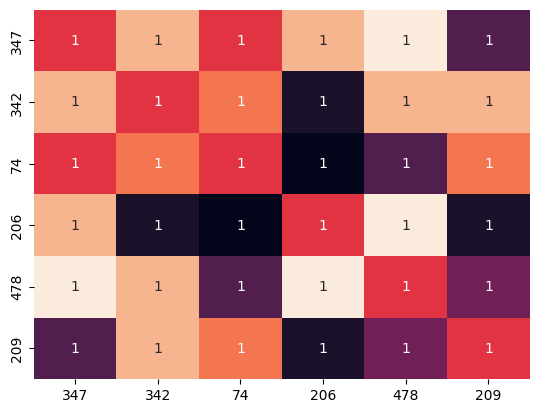

In [ ]:
# Create a DataFrame with only the selected columns
selected_df = signal_df[highly_correlated_cols]

# Create the pair plot
sns.heatmap(data = selected_df.corr(), annot=True,cbar=False);

In [ ]:
signal_df.drop(highly_correlated_cols, axis=1,inplace=True)

###Q2 E - Make all relevant modifications on the data using both functional/logical reasoning/assumptions



1.   We have droped the columns which have same value for all role. These coulmn will not help in the model prediction
2.   We have also dropped columns having the highly co related since these columns will result in multi co-linearity in the smaple
3.  We have also droped the columns which has null or NaN value more than 20% in the above steps



##Q3. Data analysis & visualisation

###Q3 A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis

Since there are more dimention in the sample dataset, We can reduce by performing the PCA and then perform the Univariate analisis

In [ ]:
X = signal_df.drop(['Pass/Fail'], axis=1)
y = signal_df[['Pass/Fail']]

x_scaled = X.apply(zscore)

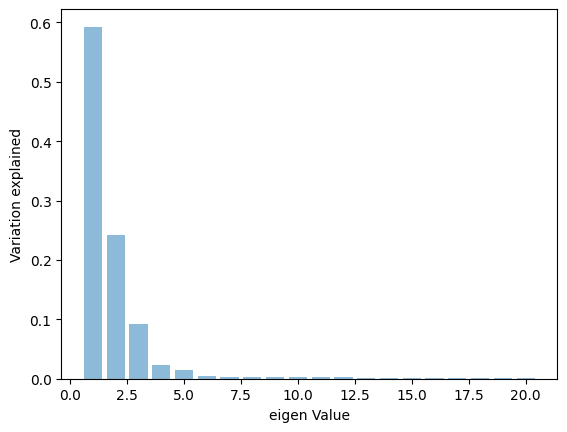

In [ ]:
pca = PCA(n_components=20)
principal_components = pca.fit_transform(X)

plt.bar(list(range(1,21)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

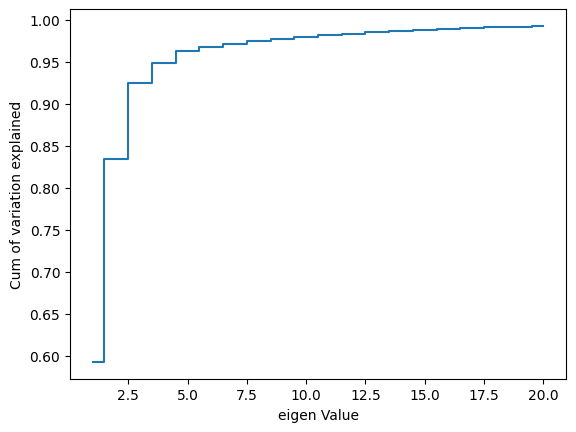

In [ ]:
plt.step(list(range(1,21)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

As we can see above we can decide the PCA n_component to be 10 using the elbow method

In [ ]:
pca10 = PCA(S=10)
pca10.fit(x_scaled)
print(pca10.components_)
print(pca10.explained_variance_ratio_)
Xpca10 = pca10.transform(x_scaled)

[[-6.03641400e-03 -8.73447815e-05 -5.34483457e-03 ...  1.13622594e-04
   2.09466286e-04  1.32827233e-02]
 [-2.38449867e-02  1.25076556e-02  9.04931917e-03 ...  2.08204943e-02
   1.70114813e-02  1.69164821e-02]
 [-8.87942167e-03 -2.82508685e-03 -5.32960717e-03 ...  4.86413318e-03
   5.17754747e-03 -6.57974540e-03]
 ...
 [-3.81996818e-03 -1.21952713e-03  5.51397987e-02 ...  9.61986973e-03
   1.52838563e-02  4.77001307e-02]
 [ 1.49038880e-02 -7.84003995e-03  4.92549399e-02 ... -1.85903669e-02
  -1.85197898e-02  1.32174418e-02]
 [ 1.44297945e-04  2.06961835e-02  1.89999259e-03 ... -1.39208728e-02
  -1.67843419e-02 -2.22339378e-02]]
[0.05694379 0.04000858 0.03111148 0.02786162 0.02248087 0.02143842
 0.01988233 0.01742689 0.01587199 0.01476704]


<Axes: >

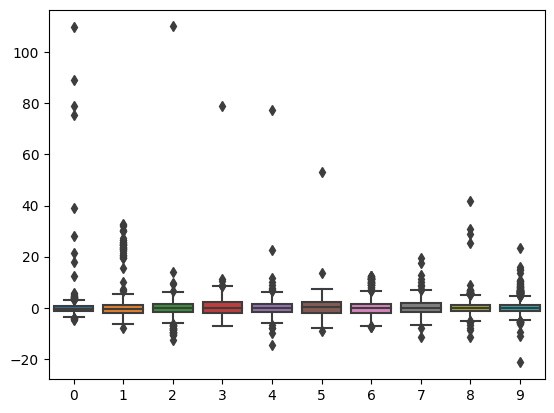

In [ ]:
sns.boxplot(pd.DataFrame(Xpca10))

In [ ]:
print(signal_df.shape)
print(Xpca10_df.shape)

(1567, 427)
(1567, 11)


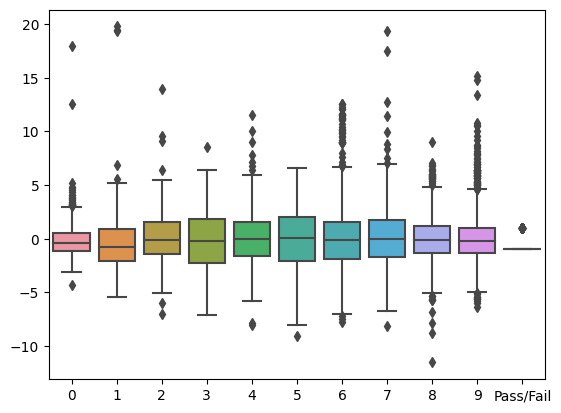

In [ ]:
Xpca10_df=pd.DataFrame(Xpca10)
Xpca10_df = pd.concat([Xpca10_df, y], axis=1)
df_without_outliers = Xpca10_df[Xpca10_df <= 20].dropna()
sns.boxplot(df_without_outliers);

1. Applied PCA to reduce the dimention and perform the univariate analysis
2. Observered that the outliers are influencing the dataset
3. Removed the extreme outliers by ploting the boxplot and keeping the threshold as 20

###Q3 B - Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.


In [ ]:
sns.pairplot(df_without_outliers)

Output hidden; open in https://colab.research.google.com to view.

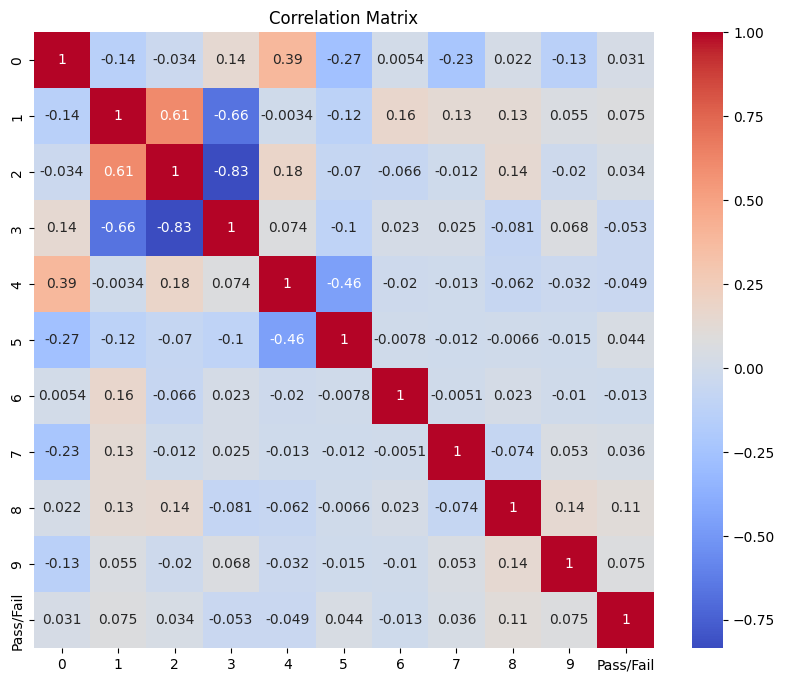

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_without_outliers.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. As we can oberserv the above pair plot and the heat map we can say that the data is not affected with the multi colinearity
2. Looking at the pairplot we can see that the data is spread in the cloud fashion and can observe 2 groups.

##4. Data pre-processing

###Q4 A - Segregate predictors vs target attributes

In [ ]:
X = df_without_outliers.drop(['Pass/Fail'], axis=1)
y = df_without_outliers[['Pass/Fail']]
y=y.replace(-1,0)

###Q4 B - Check for target balancing and fix it if found imbalanced

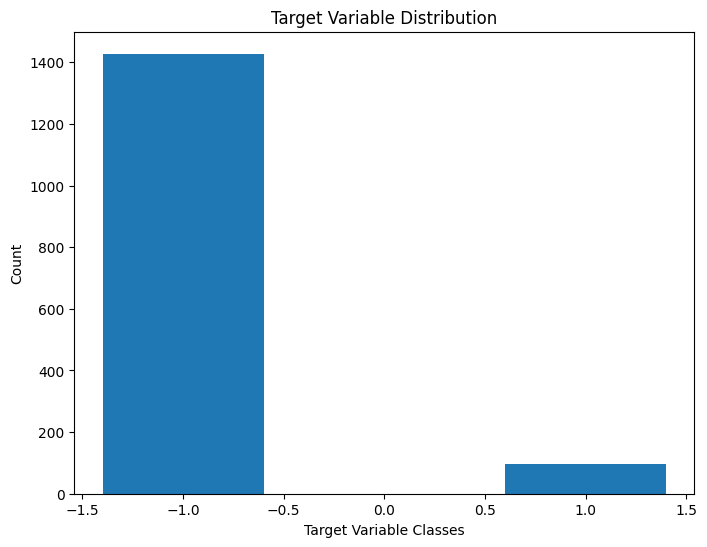

In [ ]:
target_distribution = df_without_outliers['Pass/Fail'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(target_distribution.index, target_distribution.values)
plt.xlabel('Target Variable Classes')
plt.ylabel('Count')
plt.title('Target Variable Distribution')
plt.show()

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Check the distribution after oversampling
resampled_target_distribution = y_resampled.value_counts()
print(resampled_target_distribution)

Pass/Fail
0            1428
1            1428
dtype: int64


###Q4 C - Perform train-test split and standardize the data or vice versa if required.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

###Q4 D - Check if the train and test data have similar statistical characteristics when compared with original data

In [ ]:
original_stats = df_without_outliers.describe()
original_stats

,0,1,2,3,4,5,6,7,8,9,Pass/Fail
count,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000,1523.000000
mean,-0.249639,-0.495534,0.092191,-0.194435,-0.058404,-0.091523,0.032301,0.009459,-0.068316,0.019743,-0.875246
std,1.396161,2.089880,2.060621,2.634768,2.283247,2.677491,2.902906,2.695702,2.028471,2.307358,0.483836
min,-4.290370,-5.434544,-7.047694,-7.150926,-8.052761,-9.074555,-7.724692,-8.099707,-11.543065,-6.397528,-1.000000
25%,-1.172918,-2.062469,-1.425663,-2.273325,-1.647688,-2.060301,-1.936241,-1.746986,-1.325574,-1.363160,-1.000000
50%,-0.435773,-0.732081,-0.106584,-0.206872,-0.006762,0.085576,-0.154140,0.017072,-0.155181,-0.254057,-1.000000
75%,0.508317,0.927331,1.602488,1.863914,1.541325,2.042790,1.530495,1.757089,1.172455,1.038689,-1.000000
max,17.943892,19.788817,13.936394,8.504038,11.519139,6.600457,12.523555,19.402356,9.046001,15.159197,1.000000


In [ ]:
train_stats = X_train.describe()
train_stats

,0,1,2,3,4,5,6,7,8,9
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,-0.230020,-0.420632,0.141397,-0.242066,-0.001167,-0.124114,0.032654,0.011677,-0.039602,0.015564
std,1.449910,2.167281,2.080649,2.605988,2.289076,2.631947,2.899813,2.736655,2.056577,2.295293
min,-4.290370,-5.427603,-7.047694,-7.150926,-8.052761,-9.074555,-7.473442,-6.712702,-11.543065,-5.848630
25%,-1.159408,-2.051774,-1.383805,-2.231635,-1.622634,-2.063858,-1.928605,-1.723411,-1.326172,-1.369066
50%,-0.448247,-0.609793,-0.017032,-0.287241,0.070368,0.084999,-0.198397,0.040632,-0.147772,-0.271109
75%,0.545304,0.968692,1.610584,1.764472,1.630208,1.986758,1.448893,1.851391,1.244321,1.075406
max,17.943892,19.788817,13.936394,6.409217,11.519139,6.600457,12.523555,19.402356,9.046001,15.159197


In [ ]:
test_stats = X_test.describe()
test_stats

,0,1,2,3,4,5,6,7,8,9
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,-0.295401,-0.670252,-0.022587,-0.083331,-0.191914,-0.015502,0.031476,0.004284,-0.135296,0.029489
std,1.262246,1.887825,2.010696,2.700335,2.266467,2.782293,2.913289,2.600598,1.961924,2.337764
min,-3.126078,-5.434544,-4.340454,-5.921301,-5.808776,-7.470326,-7.724692,-8.099707,-7.815177,-6.397528
25%,-1.216569,-2.139309,-1.485523,-2.374521,-1.777593,-2.051962,-1.954682,-1.797646,-1.320092,-1.357371
50%,-0.407717,-0.896389,-0.249296,0.009333,-0.135578,0.112187,0.029051,-0.006190,-0.199351,-0.223943
75%,0.473541,0.825285,1.521542,2.011335,1.418298,2.273606,1.687473,1.649314,1.049389,0.954751
max,4.838369,4.625761,5.000713,8.504038,9.005658,6.454449,12.514171,11.404778,7.097464,13.393305


##Q5. Model training, testing and tuning

###Q5 A - Use any Supervised Learning technique to train a model.

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
predicted_lables = KNN.predict(X_test)
KNN.score(X_test,y_test)

0.9343544857768052

###Q5 B - Use cross validation techniques.

In [ ]:
num_folds = 50

kfold = KFold(n_splits=num_folds)
results = cross_val_score(KNN, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.90322581 0.77419355 0.96774194 0.90322581 0.83870968 0.87096774
 0.67741935 0.90322581 0.87096774 0.80645161 0.90322581 0.90322581
 0.93548387 0.93548387 0.96774194 0.93548387 1.         0.93548387
 0.93548387 1.         1.         1.         1.         1.
 0.93333333 0.9        0.96666667 0.96666667 0.86666667 1.
 1.         1.         0.96666667 0.96666667 1.         1.
 0.93333333 0.93333333 0.93333333 0.86666667 1.         0.93333333
 0.76666667 0.9        0.96666667 0.93333333 1.         1.
 0.96666667 1.        ]
Accuracy: 93.335% (6.968%)


###Q5 C - Apply hyper-parameter tuning techniques to get the best accuracy.
###Q5 D - Use any other technique/method which can enhance the model performance
###Q5 E - Display and explain the classification report in detail.
###Q5 F - Apply the above steps for all possible models that you have learnt so far.
###Q6 A- Display and compare all the models designed with their train and test accuracies
###Q6 B - Select the final best trained model along with your detailed comments for selecting this model
###Q6 C - Pickle the selected model for future use.


In [ ]:
preprocessing_pipeline = Pipeline([
    ('standard_scaler', StandardScaler())
])
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7],
    'rf__min_samples_split': [2, 4, 6]
}
gb_param_grid = {
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7],
    'gb__min_samples_split': [2, 4, 6],
    'gb__learning_rate': [0.01, 0.1, 0.5]
}
xgb_param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
    'xgb__subsample': [0.5, 0.7, 1.0],
    'xgb__colsample_bytree': [0.5, 0.7, 1.0],
    'xgb__reg_alpha': [0, 0.001, 0.01],
    'xgb__reg_lambda': [0, 0.001, 0.01]
}
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
ls_param_grid = {
    'ls__C': [0.1, 1.0, 10.0],
    'ls__penalty': ['l1', 'l2']
}

models = [
    ("rf", RandomForestClassifier()),
    ("gb", GradientBoostingClassifier()),
    ("xgb", XGBClassifier()),
    ("knn",KNeighborsClassifier()),
    ("ls",LogisticRegression())
]

best_model = None
best_model_name = ''
best_score = 0
for model_name, model in models:
    print('--------------------------------------------------------------------')
    print('Building model : ', model_name)
    # Define full pipeline with preprocessing and model
    full_pipeline = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        (model_name, model)
    ])
    # Define parameter grid for current model
    if model_name == "rf":
        param_grid = rf_param_grid
    elif model_name == "gb":
        param_grid = gb_param_grid
    elif model_name == "xgb":
        param_grid = xgb_param_grid
    elif model_name == "knn":
        param_grid = knn_param_grid
    elif model_name == "ls":
        param_grid = ls_param_grid

    grid = GridSearchCV(full_pipeline, param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    # Print best performing parameters
    print("Best performing parameters for %s: " % model_name)
    print(grid.best_params_)
    # Evaluate performance on test set
    y_pred = grid.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("Accuracy score on test set for \'{}\': {:.2f}%" .format (model_name, score*100))
    # Update best model if current model has higher score
    if score > best_score:
      best_model = model
      best_model_name = model_name

 # Open a file for writing in binary mode
pickel_file_name = 'model.pkl'
with open(pickel_file_name, 'wb') as f:
# Serialize the data and write it to the file
  pickle.dump(best_model, f)

print('--------------------------------------------------------------------')
print('The Best model is : ',best_model_name)
print('The pickel file is stored as : ',pickel_file_name)
print('--------------------------------------------------------------------')


--------------------------------------------------------------------
Building model :  rf
Best performing parameters for rf: 
{'rf__max_depth': 3, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Accuracy score on test set for 'rf': 93.65%
--------------------------------------------------------------------
Building model :  gb
Best performing parameters for gb: 
{'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__min_samples_split': 2, 'gb__n_estimators': 50}
Accuracy score on test set for 'gb': 93.65%
--------------------------------------------------------------------
Building model :  xgb
Best performing parameters for xgb: 
{'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0.01, 'xgb__reg_lambda': 0.01, 'xgb__subsample': 0.5}
Accuracy score on test set for 'xgb': 93.65%
--------------------------------------------------------------------
Building model :  knn
Best performing parameters for knn: 
{'knn__alg

###6 D - Write your conclusion on the results

As per our previous analysis we can say that
1. the best model is Logistic regression.
2. and the fine tune parameter is : {'ls__C': 0.1, 'ls__penalty': 'l2'}
3. With Accuracy score on test set for 'ls': 93.65%

In [ ]:
%%shell
jupyter nbconvert --to html /content/FMT_Project.ipynb

[NbConvertApp] Converting notebook /content/FMT_Project.ipynb to html
[NbConvertApp] Writing 3115278 bytes to /content/FMT_Project.html
